# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_final.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)  #1500 total
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

532

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
lat = []
lng = []
temp = []
cloudiness = []
country = []
date = []
Humidity = []
temp_max = []
wind_speed = []
city_name = []

In [4]:
# Get latitude and temperature for cities
# set up lists to hold reponse info
# records = 0-50
# sets = 1-15,,
record_counter = 0
set_counter = 0
records = []
sets = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

print(f"-----------------------------")
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
# Build partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))

    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        
    except:
        print(f"City not found. Skipping...")
        pass
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 1 of set 0 | punta arenas
Processing record 2 of set 0 | humberto de campos
Processing record 3 of set 0 | saint-philippe
Processing record 4 of set 0 | mataura
Processing record 5 of set 0 | paita
Processing record 6 of set 0 | tasiilaq
Processing record 7 of set 0 | vaini
Processing record 8 of set 0 | butaritari
Processing record 9 of set 0 | caravelas
Processing record 10 of set 0 | ushuaia
Processing record 11 of set 0 | bluff
Processing record 12 of set 0 | mujiayingzi
Processing record 13 of set 0 | saraza
Processing record 14 of set 0 | san miguel de cauri
Processing record 15 of set 0 | srednekolymsk
Processing record 16 of set 0 | cape town
Processing record 17 of set 0 | hilo
Processing record 18 of set 0 | hermanus
Processing record 19 of set 0 | carutapera
Processing record 20 of set 0 | faribault
Processing record 21 of set 0 | new norfolk
Processing record 22 of set 0 |

Processing record 34 of set 3 | torbay
Processing record 35 of set 3 | saint-georges
Processing record 36 of set 3 | yulara
Processing record 37 of set 3 | luderitz
Processing record 38 of set 3 | coquimbo
Processing record 39 of set 3 | rio gallegos
Processing record 40 of set 3 | saint-louis
Processing record 41 of set 3 | kandrian
Processing record 42 of set 3 | christchurch
Processing record 43 of set 3 | hambantota
Processing record 44 of set 3 | praia da vitoria
Processing record 45 of set 3 | palabuhanratu
City not found. Skipping...
Processing record 46 of set 3 | belushya guba
City not found. Skipping...
Processing record 47 of set 3 | atar
Processing record 48 of set 3 | cabo san lucas
Processing record 49 of set 3 | bethel
Processing record 50 of set 3 | payo
Processing record 0 of set 4 | bara
Processing record 1 of set 4 | bogorodskoye
Processing record 2 of set 4 | danielskuil
Processing record 3 of set 4 | kavaratti
Processing record 4 of set 4 | northam
Processing recor

Processing record 21 of set 7 | jibuti
Processing record 22 of set 7 | yarada
Processing record 23 of set 7 | pampas
Processing record 24 of set 7 | pangnirtung
Processing record 25 of set 7 | fairbanks
Processing record 26 of set 7 | aleksandrov gay
Processing record 27 of set 7 | hervey bay
Processing record 28 of set 7 | tomatlan
Processing record 29 of set 7 | rockport
Processing record 30 of set 7 | inirida
Processing record 31 of set 7 | vostok
Processing record 32 of set 7 | ocos
Processing record 33 of set 7 | yeehaw junction
City not found. Skipping...
Processing record 34 of set 7 | college
Processing record 35 of set 7 | sabha
Processing record 36 of set 7 | quelimane
Processing record 37 of set 7 | bathsheba
Processing record 38 of set 7 | bay roberts
Processing record 39 of set 7 | karratha
Processing record 40 of set 7 | catamarca
Processing record 41 of set 7 | muravlenko
Processing record 42 of set 7 | bintulu
Processing record 43 of set 7 | cockburn town
Processing rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
                "city": cities,
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": Humidity,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": temp_max,
                "Wind Speed": wind_speed
                }
weather_data = pd.DataFrame({k: pd.Series(l) for k, l in weather_dict.items()})
weather_data.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,75.0,CL,1.635129e+09,60.0,-53.1500,-70.9167,4.06,10.80
1,humberto de campos,19.0,BR,1.635129e+09,86.0,-2.5983,-43.4611,25.67,2.76
2,saint-philippe,48.0,RE,1.635128e+09,81.0,-21.3585,55.7679,22.75,6.33
3,mataura,90.0,NZ,1.635129e+09,52.0,-46.1927,168.8643,22.09,2.19
4,paita,58.0,PE,1.635129e+09,82.0,-5.0892,-81.1144,18.76,5.83


In [8]:
weather_data.count()

city          532
Cloudiness    496
Country       496
Date          496
Humidity      496
Lat           496
Lng           496
Max Temp      496
Wind Speed    496
dtype: int64

In [9]:
# Save dataframe to a new CSV file
weather_data.to_csv("city_weather.csv",
                  encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

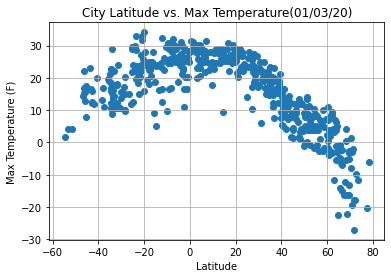

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(01/03/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_MaxTemperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

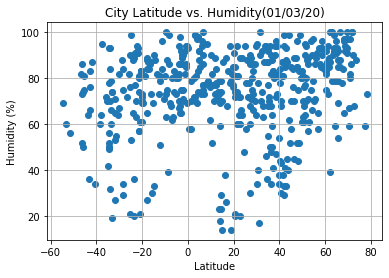

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(01/03/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

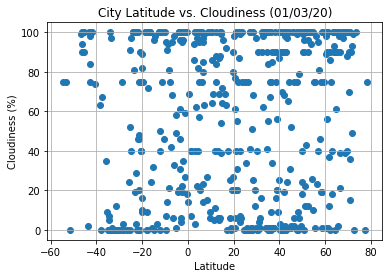

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (01/03/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

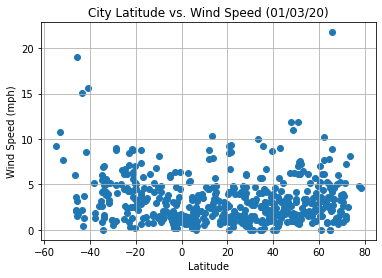

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (01/03/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitude_vs_WindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
def LinearRegressionplot(x_values, y_values):

# Perform a linear regression on Max Temp vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
    regress_values = x_values * slope + intercept
# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-" )

# Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(str(y_values.name))
    plt.annotate(line_eq,(0,0), fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = weather_data.loc[weather_data['Lat'] > 0] 
Sorthern_Hemisphere = weather_data.loc[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9026023244901681


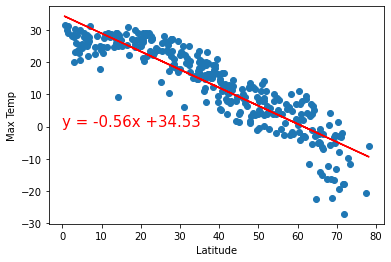

In [16]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5822002870706211


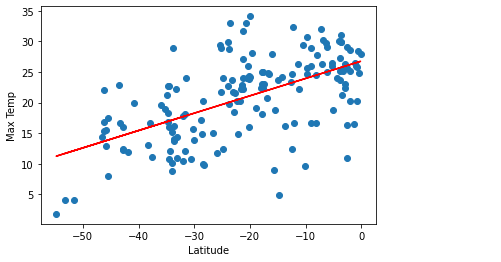

In [17]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18962027442601162


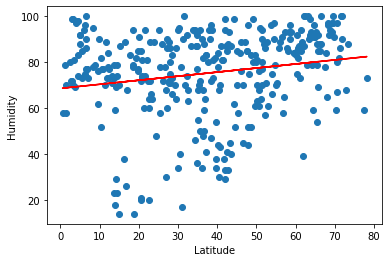

In [18]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31117245536299354


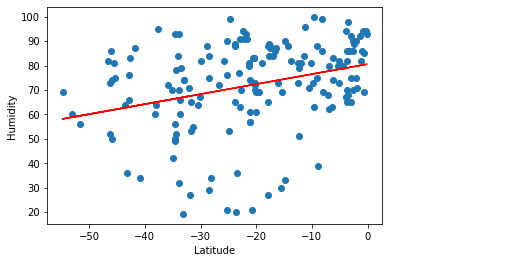

In [19]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12677451525517075


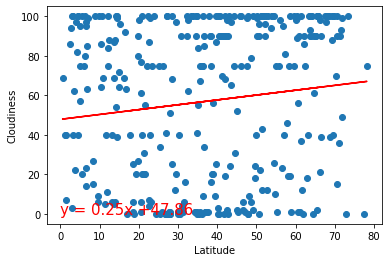

In [20]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11042559678314753


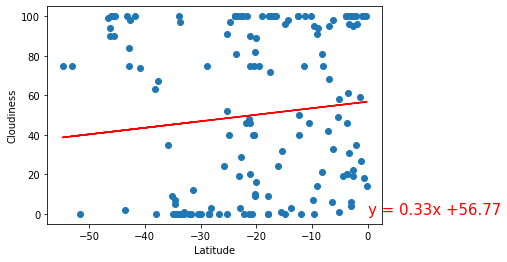

In [21]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15109286414398132


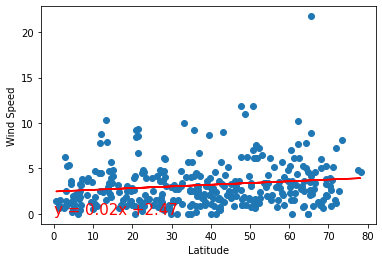

In [22]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3395523565302588


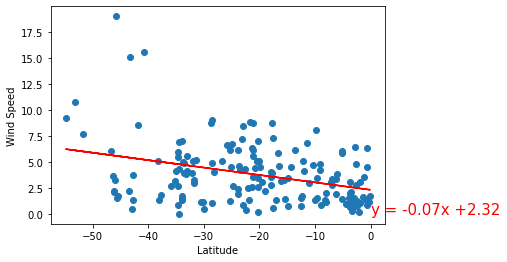

In [23]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)